# The Jansen-Rit Model

In this notebook, the basic use of the implementation of the Jansen-Rit (`jr`) model is presented. 

In the `jr` model, the activity of a particular brain region is defined...

In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from neurolib.models.jr import JRModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func

# a nice color map
#plt.rcParams['image.cmap'] = 'plasma'

## Bifurcation diagram

In [4]:
model = JRModel()
model.params['duration'] = 4.0*1000

Let's draw a simple one-dimensional bifurcation diagram of this model to orient ourselves in the parameter space

In [5]:
max_y0 = []
min_y0 = []
max_y1 = []
min_y1 = []
max_y2 = []
min_y2 = []

model.params['sigma_ou'] = 0.0

# these are the different input values that we want to scan
p_inputs = np.linspace(-0.6, 1, 100)
for ext_input in p_inputs:
    model.params['ext_input'] = ext_input
    model.run()
    max_y0.append(np.max(model.y0[0, -int(1000/model.params['dt']):]))
    min_y0.append(np.min(model.y0[0, -int(1000/model.params['dt']):]))
    max_y1.append(np.max(model.y1[0, -int(1000/model.params['dt']):]))
    min_y1.append(np.min(model.y1[0, -int(1000/model.params['dt']):]))
    max_y2.append(np.max(model.y2[0, -int(1000/model.params['dt']):]))
    min_y2.append(np.min(model.y2[0, -int(1000/model.params['dt']):]))

Text(0, 0.5, 'Min / max y0 [mV]')

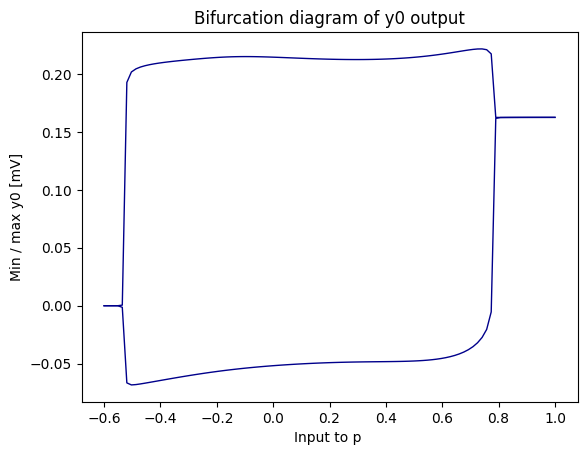

In [6]:
plt.plot(p_inputs, max_y0, c='darkblue', lw = 1)
plt.plot(p_inputs, min_y0, c='darkblue', lw = 1)
plt.title("Bifurcation diagram of y0 output")
plt.xlabel("Input to p ")
plt.ylabel("Min / max y0 [mV]")

Text(0, 0.5, 'Min / max y0 [mV]')

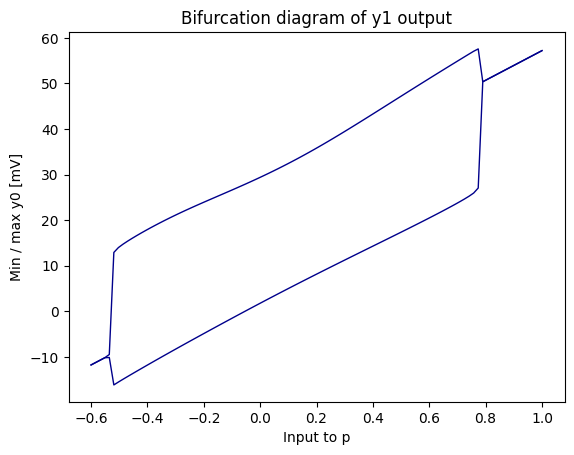

In [7]:
plt.plot(p_inputs, max_y1, c='darkblue', lw = 1)
plt.plot(p_inputs, min_y1, c='darkblue', lw = 1)
plt.title("Bifurcation diagram of y1 output")
plt.xlabel("Input to p")
plt.ylabel("Min / max y0 [mV]")

Text(0, 0.5, 'Min / max y2 [mV]')

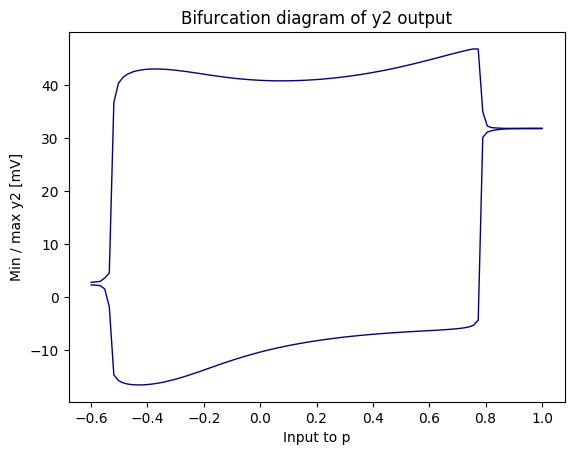

In [8]:
plt.plot(p_inputs, max_y2, c='darkblue', lw = 1)
plt.plot(p_inputs, min_y2, c='darkblue', lw = 1)
plt.title("Bifurcation diagram of y2 output")
plt.xlabel("Input to p")
plt.ylabel("Min / max y2 [mV]")

## Single node simulation

In [9]:
model = JRModel()
model.params['duration'] = 4*10000
model.params['sigma_ou'] = 0.1
model.run()

Text(0, 0.5, 'Activity [mV]')

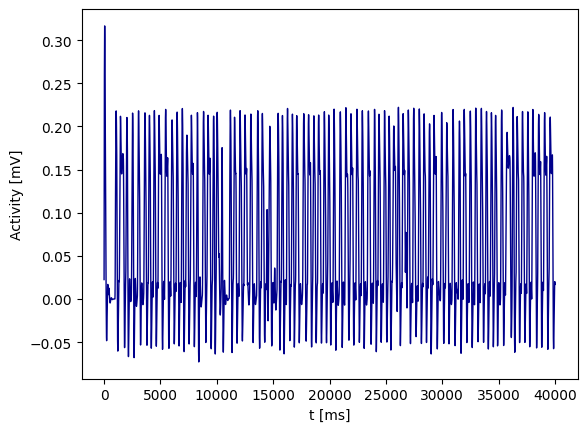

In [10]:
plt.plot(model.t, model.y0.T, c='darkblue', lw = 1)
plt.xlabel("t [ms]")
plt.ylabel("Activity [mV]")

Feuerraten

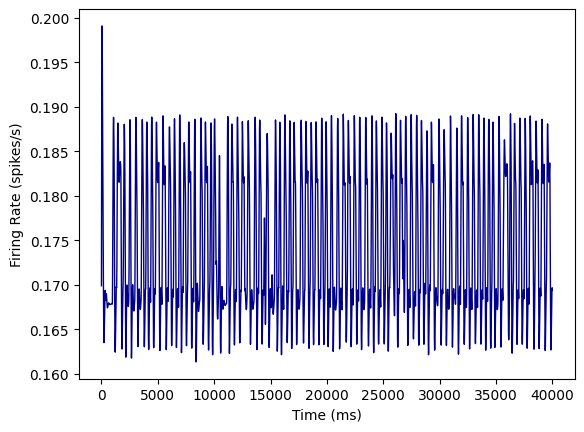

In [11]:
# Sigmoidfunktion zur Berechnung der Feuerrate
def Sigm(v, e0=2.5, v0=6, r=0.56):
    return 2.0 * e0 / (1.0 + np.exp(r * (v0 - v)))

# Berechnung der Feuerraten
firing_rates_y0 = Sigm(model.y0)

# Plotten der Feuerraten
plt.plot(model.t, firing_rates_y0.T, c='darkblue', lw=1)
plt.xlabel('Time (ms)')
plt.ylabel('Firing Rate (spikes/s)')
plt.show()

Text(0, 0.5, 'LFP [mV]')

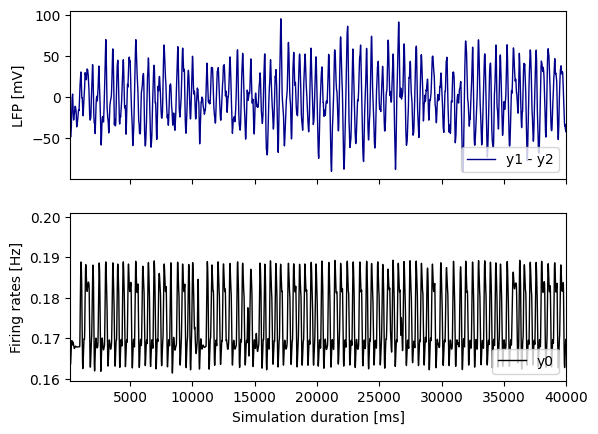

In [12]:
fig, (ax0, ax1) = plt.subplots(2,1, sharex=True)
ax1.plot(model.t, firing_rates_y0.T, color='k', linewidth=1, label='y0')
ax1.legend(loc='lower right')
ax0.plot(model.t, model.y1.T - model.y2.T, color='darkblue', linewidth=1, label='y1 - y2')
ax0.legend(loc='lower right')
ax1.set_xlabel("Simulation duration [ms]", fontsize=10)
ax1.set_xlim(200, model.params['duration'])
ax1.set_ylabel("Firing rates [Hz]", fontsize=10)
ax0.set_ylabel("LFP [mV]", fontsize=10)

Text(0, 0.5, 'LFP [mV]')

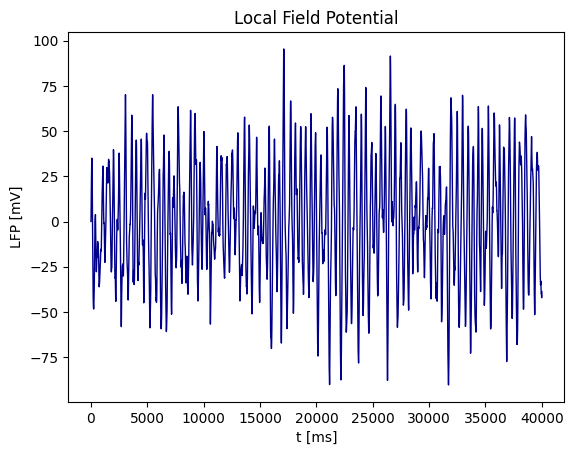

In [13]:
plt.plot(model.t, model.y1.T - model.y2.T, c='darkblue', lw = 1)
plt.title("Local Field Potential")
plt.xlabel("t [ms]")
plt.ylabel("LFP [mV]")

## Brain network

In [14]:
from neurolib.utils.loadData import Dataset

ds = Dataset("hcp")

In [15]:
model = JRModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

In [16]:
model.params['ext_input'] = 0.65
model.params['signalV'] = 0
model.params['duration'] = 20 * 1000
model.params['sigma_ou'] = 0.14

model.run()

(80, 200000)

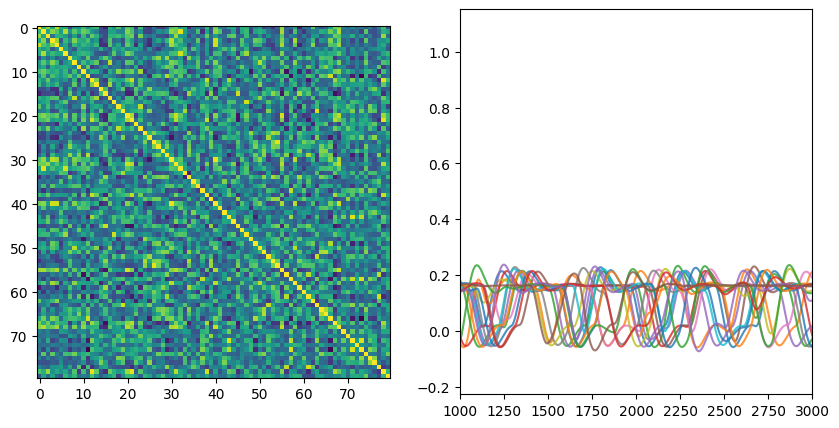

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(func.fc(model.y0[:, -10000:]))
axs[1].plot(model.t, model.y0[::5, :].T, alpha=0.8)
axs[1].set_xlim(1000, 3000)
model.y0.shape

In [18]:
scores = [func.matrix_correlation(func.fc(model.y0[:, -int(5000/model.params['dt']):]), fcemp) for fcemp in ds.FCs]
print("Correlation per subject:", [f"{s:.2}" for s in scores])
print("Mean FC/FC correlation: {:.2f}".format(np.mean(scores)))

Correlation per subject: ['-0.0067', '0.011', '0.012', '-0.00061', '-0.0089', '0.014', '-0.0059']
Mean FC/FC correlation: 0.00
